# Active LA Business Dataset Exploration

Purpose: I will be conducting data exploration on the [Listing of Active LA Businesses](https://data.lacity.org/Administration-Finance/Listing-of-Active-Businesses/6rrh-rzua/data). Because I haven't figured out how to download the dataset as a shape or geojson file, I will be focusing on non-spatial components of the data. My goal for this data exploration is to contextualize the data into different graphs.

## Importing Data Libraries and Dataset

Purpose: I import these data libraries so I can create my plots later on. For this assignment, I really only need `matplotlib.pyplot`, but I also include the other data libraries as good practice.

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# for plotting
import matplotlib.pyplot as plt

Purpose: I use `pandas` to access and read the downloaded csv file. I then assign the reader to a handler.

In [2]:
la_biz=pd.read_csv('Data/Listing_of_Active_Businesses.csv')

## Preliminary Inspection

Purpose: I use `shape` to see how many rows and columns are in the dataset.

In [3]:
la_biz.shape

(542286, 17)

Output: There are 542286 rows and 17 columns in this dataset. I know I'm working with something huge!

Purpose: I always use `info` to get a cursory glance of the contents inside each column.

In [4]:
la_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542286 entries, 0 to 542285
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOCATION ACCOUNT #         542286 non-null  object 
 1   BUSINESS NAME              542286 non-null  object 
 2   DBA NAME                   187463 non-null  object 
 3   STREET ADDRESS             542283 non-null  object 
 4   CITY                       542243 non-null  object 
 5   ZIP CODE                   542286 non-null  object 
 6   LOCATION DESCRIPTION       542253 non-null  object 
 7   MAILING ADDRESS            260496 non-null  object 
 8   MAILING CITY               260502 non-null  object 
 9   MAILING ZIP CODE           260415 non-null  object 
 10  NAICS                      486309 non-null  float64
 11  PRIMARY NAICS DESCRIPTION  486309 non-null  object 
 12  COUNCIL DISTRICT           542286 non-null  int64  
 13  LOCATION START DATE        53

Output: Each column doesn't have the same non-null count, which indicates that they are empty/null fields in the dataset. Most of the datatype appear to be objects (strings), which I will use later to generate my plots.

Purpose: I use `head()` to see the top of the dataset. It's always nice to see what you're working with.

In [5]:
la_biz.head(10)

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,YEARS ONLY,LOCATION END DATE,LOCATION
0,0002111245-0001-1,RICHARD J. RIASSETTO,NaN,1314 W 83RD STREET,LOS ANGELES,90044-2261,1314 83RD 90044-2261,1807 OAK VIEW LANE,ARCADIA,91006-1621,531100.0,Lessors of real estate (including mini warehou...,8,1/1/2029,2029.0,NaN,"(33.9636, -118.2989)"
1,0000777322-0001-3,ROBIN DENNIS TAYLOR,DARKSTAR ELECTRONICS,13400 TREGO STREET,SYLMAR,91342-1852,13400 TREGO 91342-1852,NaN,NaN,NaN,235310.0,Electrical Contractors (1997 NAICS),7,9/24/2028,2028.0,NaN,"(34.3292, -118.4247)"
2,0002674543-0001-3,INTERBORO PACKAGING CORP,NaN,114 BRACKEN ROAD,MONTGOMERY,12549-2600,114 BRACKEN 12549-2600,NaN,NaN,NaN,425120.0,Wholesale trade agents & brokers,0,8/31/2028,2028.0,NaN,"(41.5214, -74.1977)"
3,0000953943-0002-1,APARTMENT ASSOCIATION CALIFORNIA SOUTHERN CITIES,NaN,333 W BROADWAY #101,LONG BEACH,90802-4438,333 BROADWAY 90802-4438,NaN,NaN,NaN,238990.0,All other specialty trade contractors,0,7/24/2024,2024.0,NaN,"(33.7692, -118.1954)"
4,0003229872-0001-1,PERLA HERNANDEZ,BLAZIN' TIRES,419 N BOYLE AVENUE BUILDING,LOS ANGELES,90033-2441,419 BOYLE 90033,419 N BOYLE AVENUE BUILDING,LOS ANGELES,90033-2441,NaN,NaN,14,12/20/2021,2021.0,NaN,"(34.0506, -118.2182)"
5,0003224946-0001-1,JANA RAE CORPUZ,NaN,1849 SAWTELLE BLVD SUITE #610,LOS ANGELES,90025-7013,1849 SAWTELLE 90025,1849 SAWTELLE BLVD SUITE #610,LOS ANGELES,90025-7013,621330.0,Offices of mental health practitioners (except...,11,12/15/2021,2021.0,NaN,"(34.0425, -118.4454)"
6,0003221820-0001-6,BUT FIRST COFFEE INC.,NaN,11301 W Olympic #206,Los Angeles,90064-1652,11301 OLYMPIC 90064,708 N Croft,Los Angeles,90069-5304,722211.0,Limited-service eating places,11,11/11/2021,2021.0,NaN,"(34.0384, -118.442)"
7,0003228342-0001-2,AMBITIOUS STRATEGIES LLC,NaN,614 E MANCHESTER BLVD OFFICE,INGLEWOOD,90301-4800,614 MANCHESTER 90301,614 E MANCHESTER BLVD OFFICE,INGLEWOOD,90301-4800,541600.0,"Management, scientific, & technical consulting...",0,9/18/2021,2021.0,NaN,"(33.9602, -118.347)"
8,0003228259-0001-0,GOOD SHEPHERD FELLOWSHIP,GOOD SHEPHERD UNIVERSITY,10880 WILSHIRE BLVD #1101,LOS ANGELES,90024-4112,10880 WILSHIRE 90024,9935 LINDLEY AVENUE,NORTHRIDGE,91325-1044,611000.0,"Educational services (including schools, colle...",5,9/1/2021,2021.0,NaN,"(34.0585, -118.4429)"
9,0003213455-0001-5,"PORTO'S BAKERY NORTHRIDGE, INC.",NaN,19467 NORDHOFF STREET,NORTHRIDGE,91324-,19467 NORDHOFF 91324,3614 W MAGNOLIA BLVD,BURBANK,91505-2913,722110.0,Full-service restaurants,0,8/1/2021,2021.0,NaN,NaN


Output: Because I used `head(10)`, the output shows the top 10 rows of the dataset. The order is in ascending chronological order, so the most recent additions to the dataset are at the top. Something interesting I found is that the latest "Location Start Date" is 1/01/2029. The dataset appears to contain businesses that are legally registered to the Office of Finance but aren't in operation yet.

Purpose: I use `sample()` to pull random rows from the dataset.

In [6]:
la_biz.sample(5)

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,YEARS ONLY,LOCATION END DATE,LOCATION
325092,0000116620-0004-5,NATIONAL COUNCIL OF JEWISH WOMEN INC/LOS ANGEL...,NaN,12203 VENTURA BLVD,STUDIO CITY,91604-2519,12203 VENTURA 91604-2519,543 N FAIRFAX AVENUE,LOS ANGELES,90036-1715,453310.0,Used merchandise stores,2,3/15/2010,2010.0,NaN,"(34.1433, -118.3982)"
188658,0003105566-0001-4,ROE PROPERTY,NaN,10982 ROEBLING AVENUE,LOS ANGELES,90024-2753,10982 ROEBLING 90024-2753,NaN,NaN,NaN,532310.0,General rental centers,5,7/1/2015,2015.0,NaN,"(34.0645, -118.4492)"
449256,0002038304-0001-8,SUR BIN CHANG,NaN,6936 TAMPA AVENUE,RESEDA,91335-3746,6936 TAMPA 91335-3746,NaN,NaN,NaN,NaN,NaN,3,1/1/2001,2001.0,NaN,"(34.1963, -118.5535)"
353895,0002328555-0001-7,GURGEN GRIGORYAN,NaN,16325 STARE STREET,NORTH HILLS,91343-1326,16325 STARE 91343-1326,NaN,NaN,NaN,523130.0,Commodity contracts dealers,12,4/2/2008,2008.0,NaN,"(34.2529, -118.4877)"
258458,0002682161-0001-1,PAMELA JEAN BROWN ZACCAGNINO,NaN,19330 SATICOY STREET #120,RESEDA,91335-2333,19330 SATICOY 91335-2333,NaN,NaN,NaN,812990.0,All other personal services,3,5/17/2013,2013.0,NaN,"(34.2083, -118.5542)"


Output: Because I used `sample(5)`, the output shows 5 random rows from the dataset. Doing this gives a well-rounded understanding of the dataset.

## Make a Time Chart

Purpose: I use `astype(object)` to convert the 'YEARS ONLY' column from float64 to object. I need the datatype to be an object to create a time chart.

In [7]:
la_biz['YEARS ONLY'] = la_biz['YEARS ONLY'].astype(object)
la_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542286 entries, 0 to 542285
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOCATION ACCOUNT #         542286 non-null  object 
 1   BUSINESS NAME              542286 non-null  object 
 2   DBA NAME                   187463 non-null  object 
 3   STREET ADDRESS             542283 non-null  object 
 4   CITY                       542243 non-null  object 
 5   ZIP CODE                   542286 non-null  object 
 6   LOCATION DESCRIPTION       542253 non-null  object 
 7   MAILING ADDRESS            260496 non-null  object 
 8   MAILING CITY               260502 non-null  object 
 9   MAILING ZIP CODE           260415 non-null  object 
 10  NAICS                      486309 non-null  float64
 11  PRIMARY NAICS DESCRIPTION  486309 non-null  object 
 12  COUNCIL DISTRICT           542286 non-null  int64  
 13  LOCATION START DATE        53

Output: The 'YEARS ONLY' column is now an object (string).

Purpose: I summarize data by year and put the results in a dataframe using `reset_index`.

In [8]:
la_date = la_biz['YEARS ONLY'].value_counts().reset_index()
la_date

,index,YEARS ONLY
0,2018.0,38241
1,2015.0,37983
2,2017.0,36344
3,2019.0,35985
4,2016.0,35974
...,...,...
88,2029.0,1
89,1939.0,1
90,1940.0,1
91,2024.0,1


Output: The output is now a dataframe that can now be plotted. The dataframe is organized by the year with the highest counts on the top with the lowest on the bottom.

Purpose: I use `rename()` to specifically rename old column headers, 'index' and 'YEARS ONLY,' to something more appropriate. 

In [9]:
la_date = la_date.rename(columns={'index':'year','YEARS ONLY':'count'})
la_date

,year,count
0,2018.0,38241
1,2015.0,37983
2,2017.0,36344
3,2019.0,35985
4,2016.0,35974
...,...,...
88,2029.0,1
89,1939.0,1
90,1940.0,1
91,2024.0,1


Output: The output shows the desired headers: 'year' and 'count.'

Purpose: I sort the values in the dataframe by year.

In [10]:
la_date = la_date.sort_values(by='year')

Purpose: I plot the la_data dataframe as a time chart. It's important to look at the fluctuation patterns of the plot, as they can provide meaningful insight of the worldy reality during those moment of time.

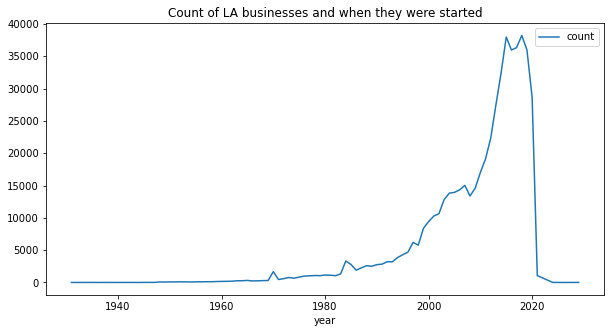

In [11]:
la_date.plot(figsize=(10,5), x='year', title='Count of LA businesses and when they were started')

Output: The output is a time chart that shows the number of newly started LA businesses over time. The dips and peaks are worth paying attention to because they speak to the influence of external influences on the economy. For example, 2014-2015 appears to have a rise in new businesses, as this period in the US was known for economic prosperitiy. That said, there is an expected drop in new businesses during 2020, which is highly contributed to the impacts of the COVID-19 and resulting recession. 

## Make a Horizontal Bar Chart

Purpose: I use `value_counts()` to individually count the different values in the 'PRIMARY NAICS DESCRIPTION' column. I then assign the value_counts to a handler.

In [12]:
la_biz["PRIMARY NAICS DESCRIPTION"].value_counts()
NAICS_count=la_biz["PRIMARY NAICS DESCRIPTION"].value_counts()
NAICS_count

Lessors of real estate (including mini warehouses & self-storage units)                                                                                                 42866
All other personal services                                                                                                                                             31780
Independent artists, writers, & performers                                                                                                                              27673
Single Family Housing Construction (1997 NAICS)                                                                                                                         14851
Motion picture & video industries (except video rental)                                                                                                                 14150
                                                                                                                                  

Output: The output organizes the different Primary NAICS Descriptions (Industry) by value counts--with the most at top and the lowest at the bottom. Lessors of real estate (eg, landlords and property managements) are the most abundant industry in LA, whereas Other amusement & recreation services are the lowest. 

Purpose: I summarize data by primary naics description and put the results in a dataframe using reset_index.

In [13]:
NAICS_count=NAICS_count.reset_index()
NAICS_count

,index,PRIMARY NAICS DESCRIPTION
0,Lessors of real estate (including mini warehou...,42866
1,All other personal services,31780
2,"Independent artists, writers, & performers",27673
3,Single Family Housing Construction (1997 NAICS),14851
4,Motion picture & video industries (except vide...,14150
...,...,...
286,Other amusement & recreation services (includi...,8
287,Other direct selling establishments (including...,5
288,Utilities,3
289,Paging,2


Output: The output is now a dataframe that can now be plotted.

Purpose: I use `rename()` to specifically rename old column headers, 'index' and 'PRIMARY NAICS DESCRIPTION,' to something more appropriate.

In [14]:
NAICS_count=NAICS_count.rename(columns={'index':'NAICS (Industry)','PRIMARY NAICS DESCRIPTION':'count'})
NAICS_count

,NAICS (Industry),count
0,Lessors of real estate (including mini warehou...,42866
1,All other personal services,31780
2,"Independent artists, writers, & performers",27673
3,Single Family Housing Construction (1997 NAICS),14851
4,Motion picture & video industries (except vide...,14150
...,...,...
286,Other amusement & recreation services (includi...,8
287,Other direct selling establishments (including...,5
288,Utilities,3
289,Paging,2


Output: The output shows the desired headers: 'NAICS (Industry)' and 'count.'

Purpose: I sort and reverse the order of the y-axis of a horizontal bar graph.

In [15]:
NAICS_count = NAICS_count.sort_values(by='count',ascending=True)
NAICS_count

,NAICS (Industry),count
290,Other amusement & recreation services (includi...,1
289,Paging,2
288,Utilities,3
287,Other direct selling establishments (including...,5
286,Other amusement & recreation services (includi...,8
...,...,...
4,Motion picture & video industries (except vide...,14150
3,Single Family Housing Construction (1997 NAICS),14851
2,"Independent artists, writers, & performers",27673
1,All other personal services,31780


Output: The output shows a dataframe with the lowest count on top with the highest on the bottom.

Purpose: I use `plot.barh()` to create a bar graph that only shows the "Top 10 NAICS (Indsutry)." I use the range [-10:] to showcase the last ten rows of the dataframe. 

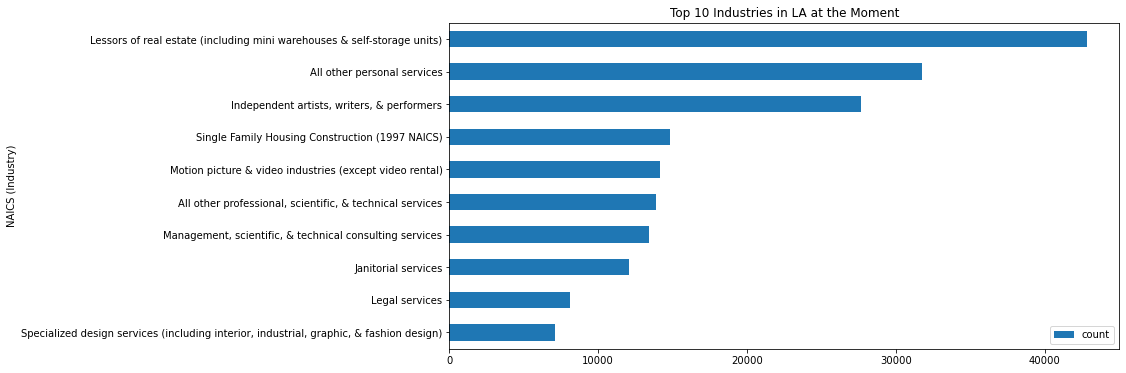

In [16]:
NAICS_count[-10:].plot.barh(figsize=(12,6),
                                      x='NAICS (Industry)',
                                      y='count',
                                      title="Top 10 Industries in LA at the Moment")

Output: The output is the "Top 10 Industries in LA at the Moment." As mentioned before, lessors of real estate are dominating the LA job scene right now. 

Purpose: I undo the reversal of the y-axis, so I can have the highest counts at the top again.

In [17]:
NAICS_count = NAICS_count.sort_values(by='count', ascending=False)
NAICS_count

,NAICS (Industry),count
0,Lessors of real estate (including mini warehou...,42866
1,All other personal services,31780
2,"Independent artists, writers, & performers",27673
3,Single Family Housing Construction (1997 NAICS),14851
4,Motion picture & video industries (except vide...,14150
...,...,...
286,Other amusement & recreation services (includi...,8
287,Other direct selling establishments (including...,5
288,Utilities,3
289,Paging,2


Output: The output is a dataframe that has NAICS (Industry) values with the highest count at the top and lowest NAICS at the bottom.

Purpose: I use plot.barh() to create a bar graph that only shows the "Bottom 10 NAICS (Indsutry)." I use the range [281:] to showcase the last ten rows of the dataframe--only rows 280-290 are shown.

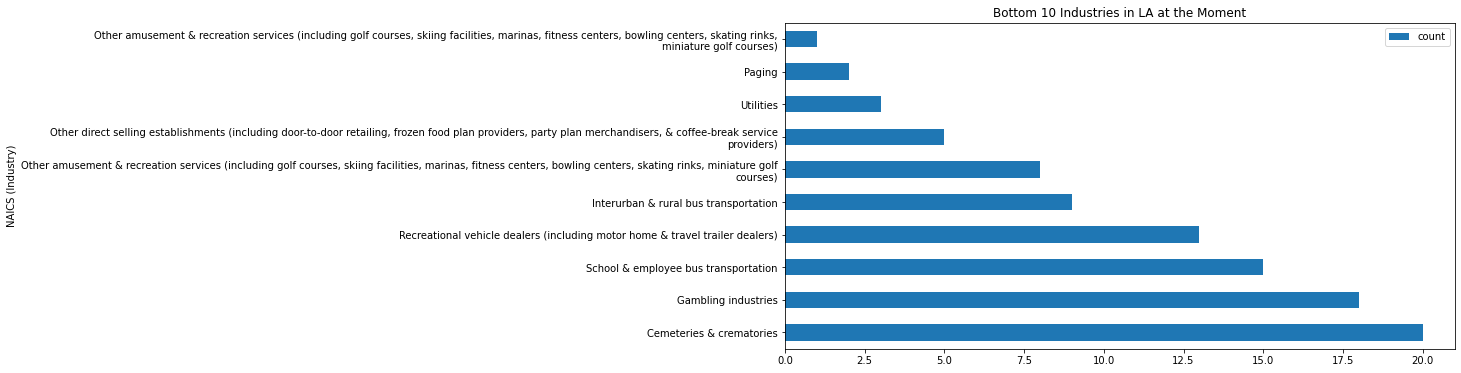

In [18]:
NAICS_count[281:].plot.barh(figsize=(12,6),
                                      x='NAICS (Industry)',
                                      y='count',
                                      title="Bottom 10 Industries in LA at the Moment")

Output: The output is the "Bottom 10 Industries in LA at the Moment." This provides strong evidence that industries that historically depend on in-person presence (eg, amusement parks) are heavily impacted by the current pandemic and are the least likely to have an increase in business.